In [1]:
import lightkurve as lk
%matplotlib inline

In [2]:
# Search for Kepler observations of Kepler-69
search_result = lk.search_lightcurve('Kepler-69', author='Kepler', cadence='long')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr008692861,0.0
1,Kepler Quarter 02,2009,Kepler,1800,kplr008692861,0.0
2,Kepler Quarter 03,2009,Kepler,1800,kplr008692861,0.0
3,Kepler Quarter 04,2010,Kepler,1800,kplr008692861,0.0
4,Kepler Quarter 05,2010,Kepler,1800,kplr008692861,0.0
5,Kepler Quarter 06,2010,Kepler,1800,kplr008692861,0.0
6,Kepler Quarter 07,2010,Kepler,1800,kplr008692861,0.0
7,Kepler Quarter 08,2011,Kepler,1800,kplr008692861,0.0
8,Kepler Quarter 09,2011,Kepler,1800,kplr008692861,0.0


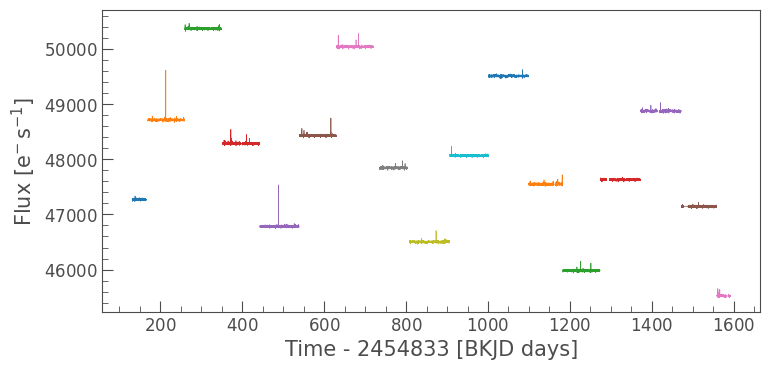

In [3]:
# Download all available Kepler lightcurves
lc_collection = search_result.download_all()
ax = lc_collection.plot()

# Remove legend since it is too big to be shown
ax.get_legend().remove()

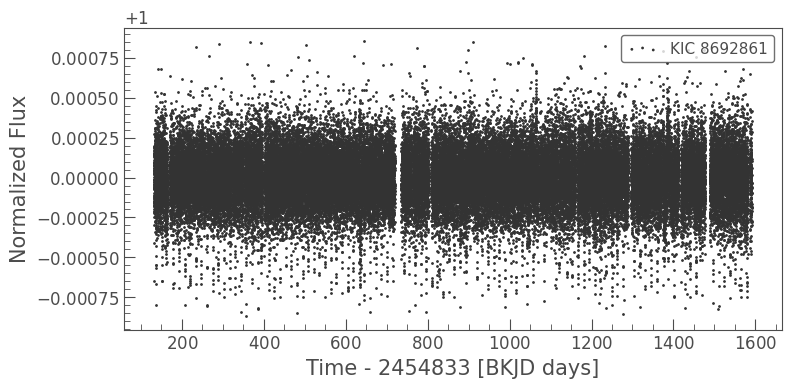

In [4]:
# Stitch quarters, flatten the light curve, remove nans and remove outliers
lc = lc_collection.stitch().flatten(window_length=901).remove_nans().remove_outliers()
lc.scatter();

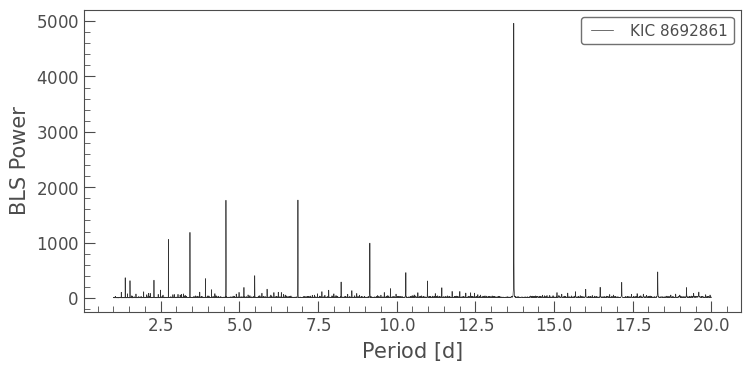

In [5]:
import numpy as np

# Create array of periods to search
period = np.linspace(1, 20, 10000)

# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();

In [6]:
# Transit parameters are extracted
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period, epoch and transit duration
print(f"Period   : {planet_b_period}")
print(f"Epoch    : {planet_b_t0} BJD")
print(f"Duration : {planet_b_dur}")

Period   : 13.721772177217725 d
Epoch    : 137.87216564080097 BJD
Duration : 0.2 d


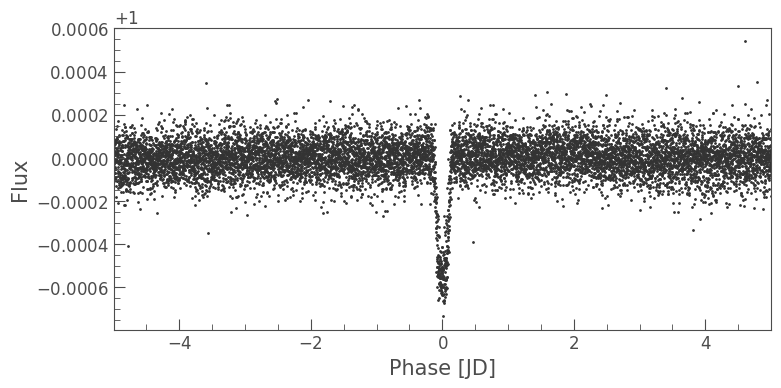

In [10]:
# Phase-fold the lightcurve using these parameters
ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).bin(0.001).scatter()
ax.set_xlim(-5, 5);

In [11]:
lc

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float64,float64,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
131.51216564080096,9.9993503e-01,1.4457853e-04,0,1.171821e-03,506.02702,82.78952,1105,4.2506926e+04,6.1916771e+00,1.5825741e+03,4.9439576e-01,4.7264848e+04,6.8339262e+00,0,nan,nan,nan,nan,506.02702,1.7156439e-04,82.78952,1.7087841e-04,-5.5481782e-03,-1.0210739e-02
131.53260016850982,9.9984311e-01,1.4476952e-04,0,1.172649e-03,506.02651,82.78931,1106,4.2503719e+04,6.1915884e+00,1.5793077e+03,4.9397963e-01,4.7260516e+04,6.8429556e+00,0,nan,nan,nan,nan,506.02651,1.7156871e-04,82.78931,1.7089408e-04,-5.5080131e-03,-1.0215473e-02
131.5530345962252,1.0001947e+00,1.4481391e-04,0,1.173476e-03,506.02723,82.78957,1107,4.2518531e+04,6.1924977e+00,1.5813121e+03,4.9408650e-01,4.7277145e+04,6.8450556e+00,0,nan,nan,nan,nan,506.02723,1.7153066e-04,82.78957,1.7086783e-04,-5.6349826e-03,-1.0369956e-02
131.5734689238161,9.9990230e-01,1.4479077e-04,0,1.174304e-03,506.02643,82.78913,1108,4.2509504e+04,6.1920638e+00,1.5787437e+03,4.9532440e-01,4.7263336e+04,6.8439636e+00,0,nan,nan,nan,nan,506.02643,1.7154469e-04,82.78913,1.7087319e-04,-5.6952755e-03,-1.0449667e-02
131.59390335141507,1.0000914e+00,1.4493583e-04,0,1.175131e-03,506.02706,82.78954,1109,4.2514508e+04,6.1923461e+00,1.5784091e+03,4.9496850e-01,4.7272289e+04,6.8508215e+00,0,nan,nan,nan,nan,506.02706,1.7153648e-04,82.78954,1.7085417e-04,-5.0795819e-03,-1.0367759e-02
131.61433787889837,9.9996918e-01,1.4481543e-04,0,1.175959e-03,506.02699,82.78910,1110,4.2510457e+04,6.1921153e+00,1.5789263e+03,4.9518844e-01,4.7266520e+04,6.8451324e+00,0,nan,nan,nan,nan,506.02699,1.7153546e-04,82.78910,1.7087309e-04,-5.1339036e-03,-1.0268716e-02
131.63477220638015,9.9993586e-01,1.4493123e-04,0,1.176786e-03,506.02653,82.78916,1111,4.2511051e+04,6.1948872e+00,1.5797786e+03,4.9548981e-01,4.7264957e+04,6.8506079e+00,0,nan,nan,nan,nan,506.02653,1.7151728e-04,82.78916,1.7086205e-04,-5.1393225e-03,-1.0189160e-02
131.6552066338554,1.0000481e+00,1.4490314e-04,0,1.177614e-03,506.02729,82.78959,1112,4.2514043e+04,6.1948805e+00,1.5794481e+03,4.9495852e-01,4.7270273e+04,6.8492818e+00,0,nan,nan,nan,nan,506.02729,1.7152402e-04,82.78959,1.7085086e-04,-4.9518966e-03,-1.0071934e-02


In [12]:
lc.colnames

['time',
 'flux',
 'flux_err',
 'quality',
 'timecorr',
 'centroid_col',
 'centroid_row',
 'cadenceno',
 'sap_flux',
 'sap_flux_err',
 'sap_bkg',
 'sap_bkg_err',
 'pdcsap_flux',
 'pdcsap_flux_err',
 'sap_quality',
 'psf_centr1',
 'psf_centr1_err',
 'psf_centr2',
 'psf_centr2_err',
 'mom_centr1',
 'mom_centr1_err',
 'mom_centr2',
 'mom_centr2_err',
 'pos_corr1',
 'pos_corr2']

In [13]:
from astropy.table import QTable
qlc = QTable( [lc['time'], lc['flux']], names=('time', 'pdcsap_flux') )
qlc

time,pdcsap_flux
,
object,float64
131.51216564080096,9.9993503e-01
131.53260016850982,9.9984311e-01
131.5530345962252,1.0001947e+00
131.5734689238161,9.9990230e-01
131.59390335141507,1.0000914e+00
131.61433787889837,9.9996918e-01
131.63477220638015,9.9993586e-01
131.6552066338554,1.0000481e+00


In [14]:
# We save PDCSAP data for the transit removal
qlc.write('Kepler-69_PDCSAP.dat', format='ascii')

Now we will look for other transiting planets to extract the additional parameters

In [15]:
# First we create the mask using BLS parameters
planet_b_mask = bls.get_transit_mask(period=planet_b_period, transit_time=planet_b_t0, duration=planet_b_dur)

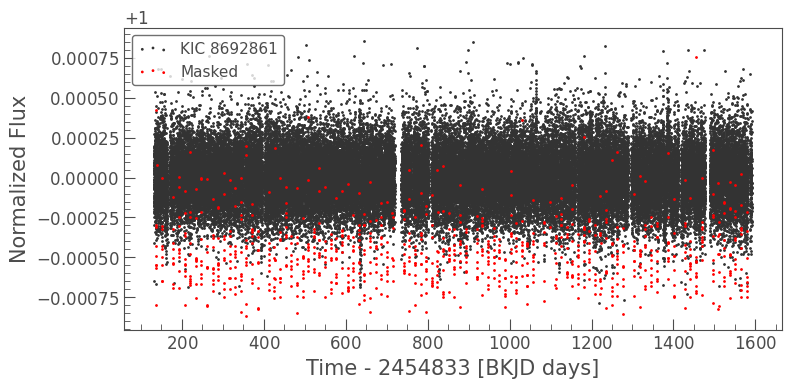

In [16]:
# Now we create a mask version of the lc
masked_lc = lc[~planet_b_mask]
ax = masked_lc.scatter();
lc[planet_b_mask].scatter(ax=ax, c='r', label='Masked')

Now we can search the remaining light curve for additional transit signals. Here, we search for long-period planets by increasing our range of periods to 1–300 days.

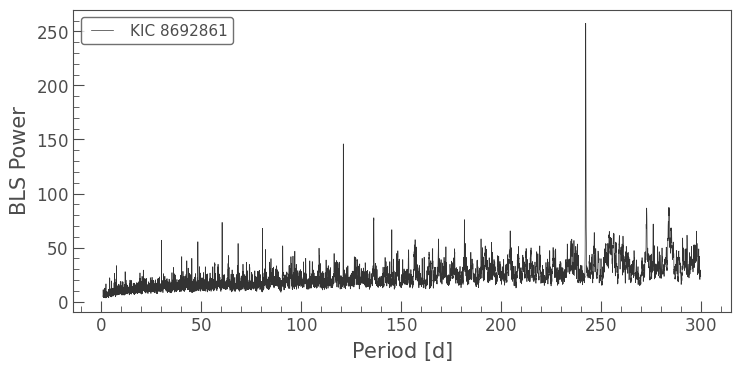

In [17]:
period = np.linspace(1,300,10000)
bls = masked_lc.to_periodogram('bls', period=period, frequency_factor=500)
bls.plot();

We can pull out the corresponding period and transit time to check the signal.

In [18]:
# Transit parameters are extracted
planet_c_period = bls.period_at_max_power
planet_c_t0 = bls.transit_time_at_max_power
planet_c_dur = bls.duration_at_max_power

# Check the value for period, epoch and transit duration
print(f"Period   : {planet_c_period}")
print(f"Epoch    : {planet_c_t0} BJD")
print(f"Duration : {planet_c_dur}")

Period   : 242.46664666466646 d
Epoch    : 150.83716564080095 BJD
Duration : 0.33 d


We plot again the phase-folded light curve to see the transit.

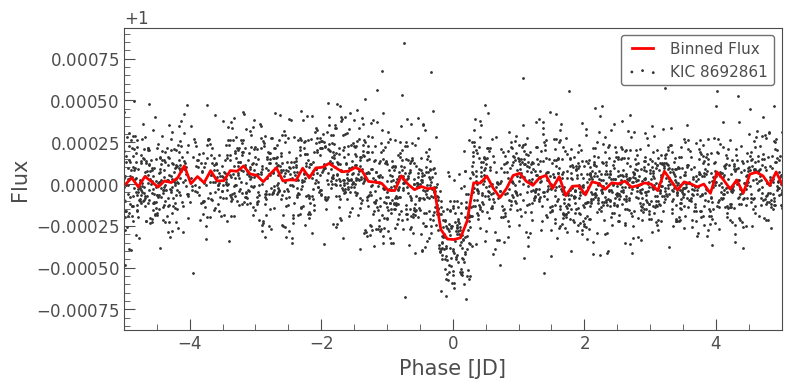

In [19]:
ax = masked_lc.fold(planet_c_period, planet_c_t0).scatter()
masked_lc.fold(planet_c_period, planet_c_t0).bin(.1).plot(ax=ax, c='r', lw=2, label='Binned Flux')
ax.set_xlim(-5, 5);

In [20]:
# Now we create the mask of planet c using BLS parameters
planet_c_mask = bls.get_transit_mask(period=planet_c_period, transit_time=planet_c_t0, duration=planet_c_dur)
full_masked_lc = masked_lc[~planet_c_mask]

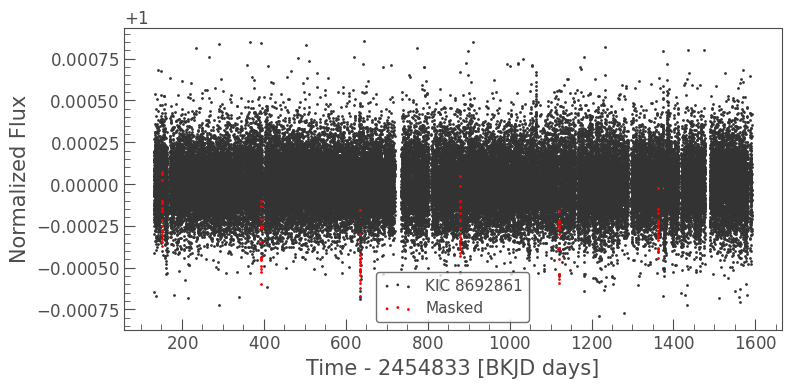

In [21]:
ax = full_masked_lc.scatter();
masked_lc[planet_c_mask].scatter(ax=ax, c='r', label='Masked')

In [24]:
qlc_masked = QTable( [full_masked_lc['time'], full_masked_lc['flux']], names=('time', 'pdcsap_flux') )
qlc_masked

time,pdcsap_flux
,
object,float64
131.51216564080096,9.9993503e-01
131.53260016850982,9.9984311e-01
131.5530345962252,1.0001947e+00
131.5734689238161,9.9990230e-01
131.59390335141507,1.0000914e+00
131.61433787889837,9.9996918e-01
131.63477220638015,9.9993586e-01
131.6552066338554,1.0000481e+00


In [25]:
# We save PDCSAP data for the transit removal
qlc_masked.write('Kepler-69_PDCSAP_masked.dat', format='ascii')

In [53]:
# Now we fill the gaps with MIARMA. There will be a bunch of irrelevant information 
# so you can redirect the output to another file. 
# The path inside the cd command should point correctly to where your MIARMA repository is.
!matlab -nojvm -nosplash -r "cd('~/Astro_local/my_repos/MIARMA/Tests/'); MIARMA('Kepler-69_PDCSAP_masked.dat'); quit;"

=
                            < M A T L A B (R) >
                  Copyright 1984-2010 The MathWorks, Inc.
                Version 7.11.0.584 (R2010b) 64-bit (glnxa64)
                              August 16, 2010



In [29]:
lc_clean = np.loadtxt('Kepler-69_PDCSAP_masked.agfs',skiprows=15)
lc_clean

array([[1.31512166e+02, 9.99935030e-01, 0.00000000e+00],
       [1.31532599e+02, 9.99843110e-01, 0.00000000e+00],
       [1.31553033e+02, 1.00019470e+00, 0.00000000e+00],
       ...,
       [1.59096134e+03, 9.99703532e-01, 0.00000000e+00],
       [1.59098177e+03, 9.99967100e-01, 0.00000000e+00],
       [1.59100220e+03, 9.99963751e-01, 0.00000000e+00]])

In [31]:
import matplotlib.pyplot as plt

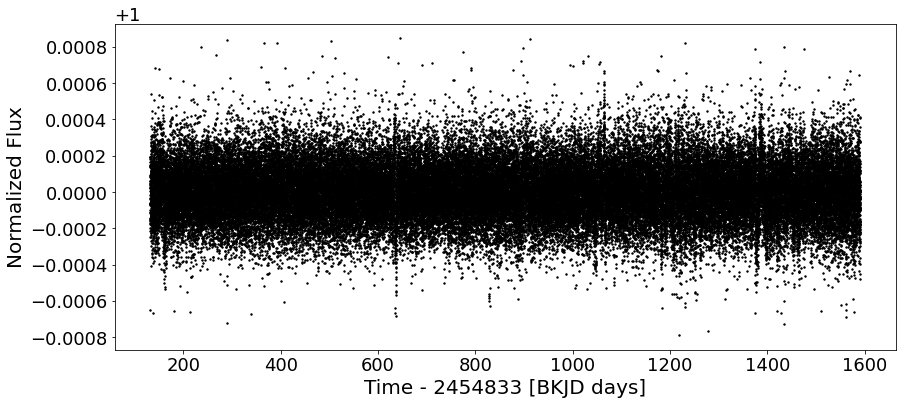

In [49]:
fig, ax = plt.subplots(figsize=(14,6))
ax.scatter(lc_clean[:,0], lc_clean[:,1],s=2,c='k')
ax.set_ylabel('Normalized Flux',fontsize=20)
ax.set_xlabel('Time - 2454833 [BKJD days]',fontsize=20)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)